# IMPORT DATA

In [1]:
# import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# import files
fname1 = 'C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Data/emdat_public_2021_06_24_query_uid-s5YWMa.csv' # EMDAT natural disaster dataset
EMDAT = pd.read_csv(fname1, dtype = 'string')

fname2 = 'C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Data/CPIAUCNS.csv' # FRED consumer price index dataset
inflation = pd.read_csv(fname2)

In [2]:
# configure plot settings
#pd.set_option('display.max_rows', None)

#SMALL_SIZE = 10
#MEDIUM_SIZE = 15
#LARGE_SIZE = 20

#plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
#plt.rc('axes', titlesize=LARGE_SIZE)     # fontsize of the axes title
#plt.rc('axes', labelsize=LARGE_SIZE)    # fontsize of the x and y labels
#plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
#plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
#plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
#plt.rc('figure', titlesize=LARGE_SIZE)  # fontsize of the figure title

# CLEAN DATA

In [3]:
# filter out irrelevant disasters
EMDAT = EMDAT[EMDAT['Disaster Group'] != 'Technological']
EMDAT = EMDAT[EMDAT['Disaster Subgroup'] != 'Extra-terrestrial']
EMDAT = EMDAT[EMDAT['Disaster Subgroup'] != 'Biological']
EMDAT = EMDAT[EMDAT['Disaster Subgroup'] != 'Complex Disasters']
EMDAT = EMDAT[EMDAT['Disaster Type'] != 'Epidemic']
EMDAT = EMDAT[EMDAT['Disaster Type'] != 'Mass movement (dry)']

# turn string values into integers
EMDAT['Year'] = [int(year) for year in EMDAT['Year']]
EMDAT['Total Damages'] = EMDAT['Total Damages'].fillna('0')
EMDAT['Total Damages'] = [int(cost) for cost in EMDAT['Total Damages']]
EMDAT['Reconstruction Costs'] = EMDAT['Reconstruction Costs'].fillna('0')
EMDAT['Reconstruction Costs'] = [int(cost) for cost in EMDAT['Reconstruction Costs']]
EMDAT['Insured Damages'] = EMDAT['Insured Damages'].fillna('0')
EMDAT['Insured Damages'] = [int(cost) for cost in EMDAT['Insured Damages']]

# take data from last 40 years as recommended by Centre de Recherche sur L’Epidemiologie des Désastres (CRED)
EMDAT = EMDAT[EMDAT['Year'] >= 1980]
EMDAT = EMDAT[EMDAT['Year'] < 2021]

# filter out irrelevant columns
columns = ['Year', 'Country', 'Disaster Group', 'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype', 'Disaster Subsubtype', 'Total Damages']
data = EMDAT[columns]
# count number of disasters in each year
disaster_counts = data['Year'].value_counts().sort_index()

# get mean CPI and CPI multiplier by year
inflation = inflation.groupby('Year').mean()

# merge tables
data = data.merge(inflation, on = 'Year')

# normalize prices to 2020 prices
data['Total Damages'] = data['Total Damages'] * data['CPI Multiplier']

# set prices from K USD to B USD
data['Total Damages'] = data['Total Damages'] / 1000000

# create new dataframes for each subgroup
hydrological_data = data[data['Disaster Subgroup'] == 'Hydrological']

# count number of disasters in each year for each subgroup
hydrological_disaster_counts = hydrological_data['Year'].value_counts().sort_index()

# save index of years
hydrological_disaster_counts_index = hydrological_disaster_counts.index

# sum costs by year
hydrological_costs = hydrological_data[['Year', 'Total Damages']]
hydrological_costs = hydrological_costs.groupby('Year').sum()
hydrological_costs = hydrological_costs.squeeze()

# SPLIT HYDROLOGICAL DISASTERS

In [4]:
# display unique types
for dtype in hydrological_data['Disaster Type'].unique():
    print(dtype)

Flood
Landslide


In [5]:
# create new dataframes for each type
flood_data = hydrological_data[hydrological_data['Disaster Type'] == 'Flood']
landslide_data = hydrological_data[hydrological_data['Disaster Type'] == 'Landslide']

# count number of disasters in each year for each subgroup
flood_disaster_counts = flood_data['Year'].value_counts().sort_index()
landslide_disaster_counts = landslide_data['Year'].value_counts().sort_index()

# save index of years
flood_disaster_counts_index = flood_disaster_counts.index
landslide_disaster_counts_index = landslide_disaster_counts.index

# HYDROLOGICAL DISASTER OCCURRENCE ANALYSIS

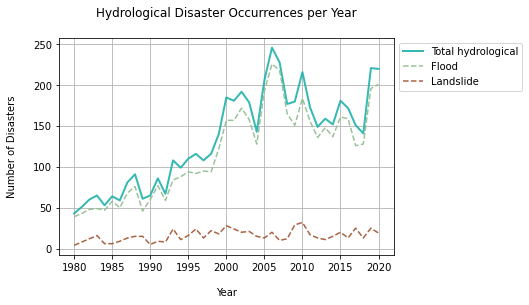

In [6]:
# HYDROLOGICAL DISASTER OCCURRENCE SINGLE LINE PLOT

plt.grid(axis = 'both')
plt.title("Hydrological Disaster Occurrences per Year\n")
plt.xlabel("\nYear")
plt.ylabel("Number of Disasters\n")
plt.plot(hydrological_disaster_counts_index,hydrological_disaster_counts, linewidth=2, color = 'lightseagreen', alpha = 0.9, label = 'Total hydrological')
plt.plot(flood_disaster_counts_index, flood_disaster_counts, linestyle = '--', color = 'darkseagreen', alpha = 0.9, label = 'Flood')
plt.plot(landslide_disaster_counts_index, landslide_disaster_counts, linestyle = '--', color = 'sienna', alpha = 0.9, label = 'Landslide')

lgd = plt.legend(bbox_to_anchor=(1,1), loc = 'upper left')

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Hydrological Disasters/hydrological figures/hydrologicalDisastersPerYearSLP.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

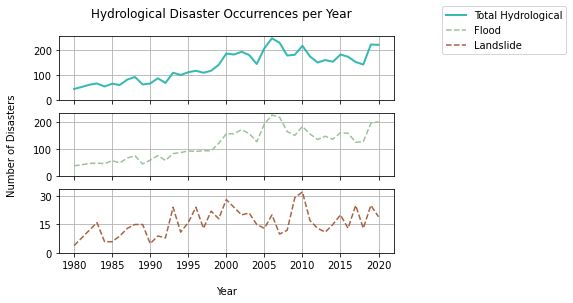

In [7]:
# HYDROLOGICAL DISASTER OCCURRENCE MULTIPLE LINE PLOTS

fig, axs = plt.subplots(3, sharex = True)
fig.suptitle("Hydrological Disaster Occurrences per Year\n")
axs[1].set_ylabel("Number of Disasters\n")
axs[2].set_xlabel("\nYear")

axs[0].plot(hydrological_disaster_counts_index, hydrological_disaster_counts, linewidth=2, color = 'lightseagreen', alpha = 0.9, label = 'Total Hydrological')
axs[1].plot(flood_disaster_counts_index, flood_disaster_counts, linestyle = '--', color = 'darkseagreen', alpha = 0.9, label = 'Flood')
axs[2].plot(landslide_disaster_counts_index, landslide_disaster_counts, linestyle = '--', color = 'sienna', alpha = 0.9, label = 'Landslide')

plt.sca(axs[0])
plt.yticks(np.linspace(0,200,3))
plt.grid(axis = 'both')

plt.sca(axs[1])
plt.yticks(np.linspace(0,200,3))
plt.grid(axis = 'both')

plt.sca(axs[2])
plt.yticks(np.linspace(0,30,3))
plt.grid(axis = 'both')

lgd = fig.legend(bbox_to_anchor=(1,1), loc = 'upper left')
plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Hydrological Disasters/hydrological figures/hydrologicalDisastersPerYearMLP.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

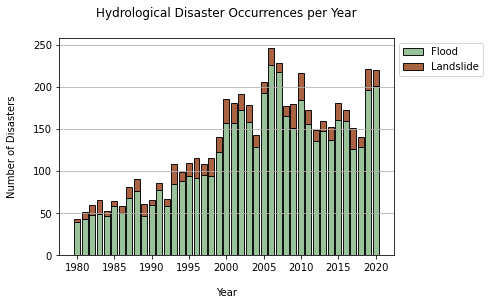

In [8]:
# HYDROLOGICAL DISASTER OCCURRENCE SINGLE BAR CHART

plt.grid(axis = 'y')
plt.title("Hydrological Disaster Occurrences per Year\n")
plt.xlabel("\nYear")
plt.ylabel("Number of Disasters\n")

plt.bar(flood_disaster_counts_index, flood_disaster_counts, edgecolor = 'black', color = 'darkseagreen', alpha = 0.9, label = 'Flood')
plt.bar(landslide_disaster_counts_index, landslide_disaster_counts, bottom = flood_disaster_counts, edgecolor = 'black', color = 'sienna', alpha = 0.9, label = 'Landslide')

lgd = plt.legend(bbox_to_anchor=(1,1), loc = 'upper left')

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Hydrological Disasters/hydrological figures/hydrologicalDisastersPerYearSBC.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

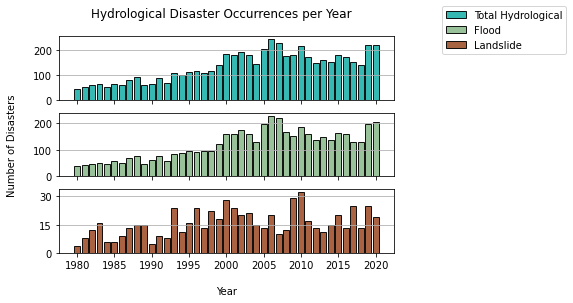

In [9]:
# HYDROLOGICAL DISASTER OCCURRENCE MULTIPLE BAR CHARTS

fig, axs = plt.subplots(3, sharex = True)
fig.suptitle("Hydrological Disaster Occurrences per Year\n")
axs[1].set_ylabel("Number of Disasters\n")
axs[2].set_xlabel("\nYear")

axs[0].bar(hydrological_disaster_counts_index, hydrological_disaster_counts, edgecolor = 'black', color = 'lightseagreen', alpha = 0.9, label = 'Total Hydrological')
axs[1].bar(flood_disaster_counts_index, flood_disaster_counts, edgecolor = 'black', color = 'darkseagreen', alpha = 0.9, label = 'Flood')
axs[2].bar(landslide_disaster_counts_index, landslide_disaster_counts, edgecolor = 'black', color = 'sienna', alpha = 0.9, label = 'Landslide')

plt.sca(axs[0])
plt.yticks(np.linspace(0,200,3))
plt.grid(axis = 'y')

plt.sca(axs[1])
plt.yticks(np.linspace(0,200,3))
plt.grid(axis = 'y')

plt.sca(axs[2])
plt.yticks(np.linspace(0,30,3))
plt.grid(axis = 'y')

lgd = fig.legend(bbox_to_anchor=(1,1), loc = 'upper left')

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/hydrological Disasters/hydrological figures/hydrologicalDisastersPerYearMBC.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

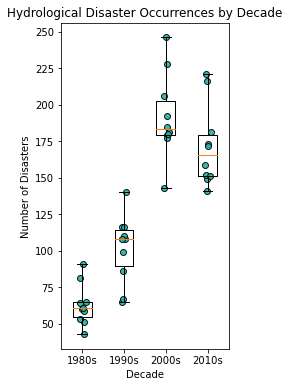

In [10]:
# HYDROLOGICAL DISASTER OCCURRENCE BOXPLOT

total_box_data = [hydrological_disaster_counts[0:10], hydrological_disaster_counts[10:20], hydrological_disaster_counts[20:30], hydrological_disaster_counts[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

x0 = [np.random.normal(1,0.04,10)]
x1 = [np.random.normal(2,0.04,10)]
x2 = [np.random.normal(3,0.04,10)]
x3 = [np.random.normal(4,0.04,10)]

plt.figure(figsize=(3,6))
plt.title("Hydrological Disaster Occurrences by Decade")
plt.xlabel("Decade")
plt.ylabel("Number of Disasters")

plt.boxplot(total_box_data, labels = box_labels, whis = [0, 100])

plt.scatter(x0,total_box_data[0], color = 'lightseagreen', edgecolor = 'black', alpha = 0.9)
plt.scatter(x1,total_box_data[1], color = 'lightseagreen', edgecolor = 'black', alpha = 0.9)
plt.scatter(x2,total_box_data[2], color = 'lightseagreen', edgecolor = 'black', alpha = 0.9)
plt.scatter(x3,total_box_data[3], color = 'lightseagreen', edgecolor = 'black', alpha = 0.9)

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Hydrological Disasters/hydrological figures/hydrologicalDisastersPerYearBOX.png", bbox_inches='tight')

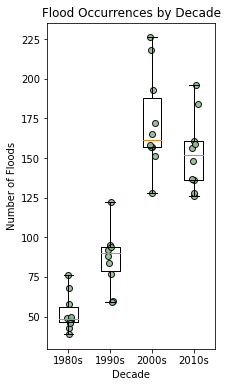

In [11]:
# FLOOD OCCURRENCE BOXPLOT

total_box_data = [flood_disaster_counts[0:10], flood_disaster_counts[10:20], flood_disaster_counts[20:30], flood_disaster_counts[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

x0 = [np.random.normal(1,0.04,10)]
x1 = [np.random.normal(2,0.04,10)]
x2 = [np.random.normal(3,0.04,10)]
x3 = [np.random.normal(4,0.04,10)]

plt.figure(figsize=(3,6))
plt.title("Flood Occurrences by Decade")
plt.xlabel("Decade")
plt.ylabel("Number of Floods")

plt.boxplot(total_box_data, labels = box_labels, whis = [0, 100])

plt.scatter(x0,total_box_data[0], color = 'darkseagreen', edgecolor = 'black', alpha = 0.9)
plt.scatter(x1,total_box_data[1], color = 'darkseagreen', edgecolor = 'black', alpha = 0.9)
plt.scatter(x2,total_box_data[2], color = 'darkseagreen', edgecolor = 'black', alpha = 0.9)
plt.scatter(x3,total_box_data[3], color = 'darkseagreen', edgecolor = 'black', alpha = 0.9)

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Hydrological Disasters/hydrological figures/floodsPerYearBOX.png", bbox_inches='tight')

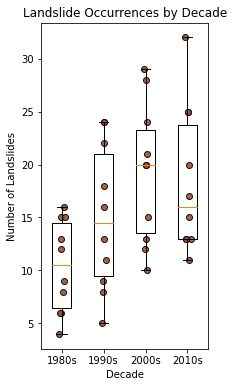

In [12]:
# LANDSLIDE OCCURRENCE BOXPLOT

total_box_data = [landslide_disaster_counts[0:10], landslide_disaster_counts[10:20], landslide_disaster_counts[20:30], landslide_disaster_counts[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

x0 = [np.random.normal(1,0.04,10)]
x1 = [np.random.normal(2,0.04,10)]
x2 = [np.random.normal(3,0.04,10)]
x3 = [np.random.normal(4,0.04,10)]

plt.figure(figsize=(3,6))
plt.title("Landslide Occurrences by Decade")
plt.xlabel("Decade")
plt.ylabel("Number of Landslides")

plt.boxplot(total_box_data, labels = box_labels, whis = [0, 100])

plt.scatter(x0,total_box_data[0], color = 'sienna', edgecolor = 'black', alpha = 0.9)
plt.scatter(x1,total_box_data[1], color = 'sienna', edgecolor = 'black', alpha = 0.9)
plt.scatter(x2,total_box_data[2], color = 'sienna', edgecolor = 'black', alpha = 0.9)
plt.scatter(x3,total_box_data[3], color = 'sienna', edgecolor = 'black', alpha = 0.9)

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Hydrological Disasters/hydrological figures/landslidesPerYearBOX.png", bbox_inches='tight')

# HYDROLOGICAL DISASTER OCCURRENCE STATISTICS

In [13]:
# HYDROLOGICAL DISASTER OCCURRENCE STATISTICS

print("HYDROLOGICAL DISASTER OCCURRENCE STATISTICS")

# hydrological disaster occurrence (total statistics)
print("\nHydrological disaster occurrence (total statistics): ")
print(hydrological_disaster_counts.describe())

# hydrological disaster occurrence (1980s statistics)
print("\nHydrological disaster occurrence (1980s statistics): ")
print(hydrological_disaster_counts[0:10].describe())

# hydrological disaster occurrence (1990s statistics)
print("\nHydrological disaster occurrence (1990s statistics): ")
print(hydrological_disaster_counts[10:20].describe())

# hydrological disaster occurrence (2000s statistics)
print("\nHydrological disaster occurrence (2000s statistics): ")
print(hydrological_disaster_counts[20:30].describe())

# hydrological disaster occurrence (2010s statistics)
print("\nHydrological disaster occurrence (2010s statistics): ")
print(hydrological_disaster_counts[30:40].describe())

print("\n")

# HYDROLOGICAL DISASTER OCCURRENCE STATISTICAL CHANGES (1980s-2010s)

print("HYDROLOGICAL DISASTER OCCURRENCE STATISTICAL CHANGES (1980s-2010s)\n")

# change in mean yearly number of hydrological disasters (1980s-2010s)
hydrological_occurrence_mean_1980s = hydrological_disaster_counts[0:10].mean()
hydrological_occurrence_mean_2010s = hydrological_disaster_counts[30:40].mean()
hydrological_occurrence_mean_percent_change_1980_to_2020 = 100*(hydrological_occurrence_mean_2010s-hydrological_occurrence_mean_1980s)/abs(hydrological_occurrence_mean_1980s)
print("Change in mean yearly number of hydrological disasters (1980s-2010s): {:.2f}%".format(hydrological_occurrence_mean_percent_change_1980_to_2020))

# change in maximum yearly number of hydrological disasters (1980s-2010s)
hydrological_occurrence_max_1980s = hydrological_disaster_counts[0:10].max()
hydrological_occurrence_max_2010s = hydrological_disaster_counts[30:40].max()
hydrological_occurrence_max_percent_change_1980_to_2020 = 100*(hydrological_occurrence_max_2010s-hydrological_occurrence_max_1980s)/abs(hydrological_occurrence_max_1980s)
print("Change in maximum yearly number of hydrological disasters (1980s-2010s): {:.2f}%".format(hydrological_occurrence_max_percent_change_1980_to_2020))

# change in minimum yearly number of hydrological disasters (1980s-2010s)
hydrological_occurrence_min_1980s = hydrological_disaster_counts[0:10].min()
hydrological_occurrence_min_2010s = hydrological_disaster_counts[30:40].min()
hydrological_occurrence_min_percent_change_1980_to_2020 = 100*(hydrological_occurrence_min_2010s-hydrological_occurrence_min_1980s)/abs(hydrological_occurrence_min_1980s)
print("Change in minimum yearly number of hydrological disasters (1980s-2010s): {:.2f}%".format(hydrological_occurrence_min_percent_change_1980_to_2020))

# change in standard deviation of yearly number of hydrological disasters (1980s-2010s)
hydrological_occurrence_std_1980s = hydrological_disaster_counts[0:10].std()
hydrological_occurrence_std_2010s = hydrological_disaster_counts[30:40].std()
hydrological_occurrence_std_percent_change_1980_to_2020 = 100*(hydrological_occurrence_std_2010s-hydrological_occurrence_std_1980s)/abs(hydrological_occurrence_std_1980s)
print("Change in standard deviation of yearly number of hydrological disasters (1980s-2010s): {:.2f}%\n".format(hydrological_occurrence_std_percent_change_1980_to_2020))

HYDROLOGICAL DISASTER OCCURRENCE STATISTICS

Hydrological disaster occurrence (total statistics): 
count     41.000000
mean     134.024390
std       58.535241
min       43.000000
25%       81.000000
50%      141.000000
75%      180.000000
max      246.000000
Name: Year, dtype: float64

Hydrological disaster occurrence (1980s statistics): 
count    10.000000
mean     62.800000
std      14.085453
min      43.000000
25%      54.500000
50%      60.500000
75%      64.750000
max      91.000000
Name: Year, dtype: float64

Hydrological disaster occurrence (1990s statistics): 
count     10.00000
mean     101.50000
std       23.16247
min       65.00000
25%       89.25000
50%      108.00000
75%      114.50000
max      140.00000
Name: Year, dtype: float64

Hydrological disaster occurrence (2000s statistics): 
count     10.000000
mean     191.700000
std       28.898481
min      143.000000
25%      179.250000
50%      183.000000
75%      202.500000
max      246.000000
Name: Year, dtype: float64

Hyd

In [14]:
# FLOOD OCCURRENCE STATISTICS

print("FLOOD OCCURRENCE STATISTICS")

# flood occurrence (total statistics)
print("\nFlood occurrence (total statistics): ")
print(flood_disaster_counts.describe())

# flood occurrence (1980s statistics)
print("\nFlood occurrence (1980s statistics): ")
print(flood_disaster_counts[0:10].describe())

# flood occurrence (1990s statistics)
print("\nFlood occurrence (1990s statistics): ")
print(flood_disaster_counts[10:20].describe())

# flood occurrence (2000s statistics)
print("\nFlood occurrence (2000s statistics): ")
print(flood_disaster_counts[20:30].describe())

# flood occurrence (2010s statistics)
print("\nFlood occurrence (2010s statistics): ")
print(flood_disaster_counts[30:40].describe())

print("\n")

# FLOOD OCCURRENCE STATISTICAL CHANGES (1980s-2010s)

print("FLOOD OCCURRENCE STATISTICAL CHANGES (1980s-2010s)\n")

# change in mean yearly number of floods (1980s-2010s)
flood_occurrence_mean_1980s = flood_disaster_counts[0:10].mean()
flood_occurrence_mean_2010s = flood_disaster_counts[30:40].mean()
flood_occurrence_mean_percent_change_1980_to_2020 = 100*(flood_occurrence_mean_2010s-flood_occurrence_mean_1980s)/abs(flood_occurrence_mean_1980s)
print("Change in mean yearly number of floods (1980s-2010s): {:.2f}%".format(flood_occurrence_mean_percent_change_1980_to_2020))

# change in maximum yearly number of floods (1980s-2010s)
flood_occurrence_max_1980s = flood_disaster_counts[0:10].max()
flood_occurrence_max_2010s = flood_disaster_counts[30:40].max()
flood_occurrence_max_percent_change_1980_to_2020 = 100*(flood_occurrence_max_2010s-flood_occurrence_max_1980s)/abs(flood_occurrence_max_1980s)
print("Change in maximum yearly number of floods (1980s-2010s): {:.2f}%".format(flood_occurrence_max_percent_change_1980_to_2020))

# change in minimum yearly number of floods (1980s-2010s)
flood_occurrence_min_1980s = flood_disaster_counts[0:10].min()
flood_occurrence_min_2010s = flood_disaster_counts[30:40].min()
flood_occurrence_min_percent_change_1980_to_2020 = 100*(flood_occurrence_min_2010s-flood_occurrence_min_1980s)/abs(flood_occurrence_min_1980s)
print("Change in minimum yearly number of floods (1980s-2010s): {:.2f}%".format(flood_occurrence_min_percent_change_1980_to_2020))

# change in standard deviation of yearly number of floods (1980s-2010s)
flood_occurrence_std_1980s = flood_disaster_counts[0:10].std()
flood_occurrence_std_2010s = flood_disaster_counts[30:40].std()
flood_occurrence_std_percent_change_1980_to_2020 = 100*(flood_occurrence_std_2010s-flood_occurrence_std_1980s)/abs(flood_occurrence_std_1980s)
print("Change in standard deviation of yearly number of floods (1980s-2010s): {:.2f}%\n".format(flood_occurrence_std_percent_change_1980_to_2020))

FLOOD OCCURRENCE STATISTICS

Flood occurrence (total statistics): 
count     41.000000
mean     118.195122
std       54.655841
min       39.000000
25%       68.000000
50%      126.000000
75%      158.000000
max      226.000000
Name: Year, dtype: float64

Flood occurrence (1980s statistics): 
count    10.000000
mean     52.400000
std      11.577756
min      39.000000
25%      46.250000
50%      48.500000
75%      56.000000
max      76.000000
Name: Year, dtype: float64

Flood occurrence (1990s statistics): 
count     10.000000
mean      86.500000
std       18.356047
min       59.000000
25%       78.750000
50%       90.000000
75%       94.000000
max      122.000000
Name: Year, dtype: float64

Flood occurrence (2000s statistics): 
count     10.000000
mean     172.500000
std       30.808549
min      128.000000
25%      157.000000
50%      161.500000
75%      187.750000
max      226.000000
Name: Year, dtype: float64

Flood occurrence (2010s statistics): 
count     10.000000
mean     153.1000

In [15]:
# LANDSLIDE OCCURRENCE STATISTICS

print("LANDSLIDE OCCURRENCE STATISTICS")

# landslide occurrence (total statistics)
print("\nLandslide occurrence (total statistics): ")
print(landslide_disaster_counts.describe())

# landslide occurrence (1980s statistics)
print("\nLandslide occurrence (1980s statistics): ")
print(landslide_disaster_counts[0:10].describe())

# landslide occurrence (1990s statistics)
print("\nLandslide occurrence (1990s statistics): ")
print(landslide_disaster_counts[10:20].describe())

# landslide occurrence (2000s statistics)
print("\nLandslide occurrence (2000s statistics): ")
print(landslide_disaster_counts[20:30].describe())

# landslide occurrence (2010s statistics)
print("\nLandslide occurrence (2010s statistics): ")
print(landslide_disaster_counts[30:40].describe())

print("\n")

# LANDSLIDE OCCURRENCE STATISTICAL CHANGES (1980s-2010s)

print("LANDSLIDE OCCURRENCE STATISTICAL CHANGES (1980s-2010s)\n")

# change in mean yearly number of landslides (1980s-2010s)
landslide_occurrence_mean_1980s = landslide_disaster_counts[0:10].mean()
landslide_occurrence_mean_2010s = landslide_disaster_counts[30:40].mean()
landslide_occurrence_mean_percent_change_1980_to_2020 = 100*(landslide_occurrence_mean_2010s-landslide_occurrence_mean_1980s)/abs(landslide_occurrence_mean_1980s)
print("Change in mean yearly number of landslides (1980s-2010s): {:.2f}%".format(landslide_occurrence_mean_percent_change_1980_to_2020))

# change in maximum yearly number of landslides (1980s-2010s)
landslide_occurrence_max_1980s = landslide_disaster_counts[0:10].max()
landslide_occurrence_max_2010s = landslide_disaster_counts[30:40].max()
landslide_occurrence_max_percent_change_1980_to_2020 = 100*(landslide_occurrence_max_2010s-landslide_occurrence_max_1980s)/abs(landslide_occurrence_max_1980s)
print("Change in maximum yearly number of landslides (1980s-2010s): {:.2f}%".format(landslide_occurrence_max_percent_change_1980_to_2020))

# change in minimum yearly number of landslides (1980s-2010s)
landslide_occurrence_min_1980s = landslide_disaster_counts[0:10].min()
landslide_occurrence_min_2010s = landslide_disaster_counts[30:40].min()
landslide_occurrence_min_percent_change_1980_to_2020 = 100*(landslide_occurrence_min_2010s-landslide_occurrence_min_1980s)/abs(landslide_occurrence_min_1980s)
print("Change in minimum yearly number of landslides (1980s-2010s): {:.2f}%".format(landslide_occurrence_min_percent_change_1980_to_2020))

# change in standard deviation of yearly number of landslides (1980s-2010s)
landslide_occurrence_std_1980s = landslide_disaster_counts[0:10].std()
landslide_occurrence_std_2010s = landslide_disaster_counts[30:40].std()
landslide_occurrence_std_percent_change_1980_to_2020 = 100*(landslide_occurrence_std_2010s-landslide_occurrence_std_1980s)/abs(landslide_occurrence_std_1980s)
print("Change in standard deviation of yearly number of landslides (1980s-2010s): {:.2f}%\n".format(landslide_occurrence_std_percent_change_1980_to_2020))

LANDSLIDE OCCURRENCE STATISTICS

Landslide occurrence (total statistics): 
count    41.000000
mean     15.829268
std       6.913402
min       4.000000
25%      11.000000
50%      15.000000
75%      20.000000
max      32.000000
Name: Year, dtype: float64

Landslide occurrence (1980s statistics): 
count    10.000000
mean     10.400000
std       4.351245
min       4.000000
25%       6.500000
50%      10.500000
75%      14.500000
max      16.000000
Name: Year, dtype: float64

Landslide occurrence (1990s statistics): 
count    10.000000
mean     15.000000
std       6.879922
min       5.000000
25%       9.500000
50%      14.500000
75%      21.000000
max      24.000000
Name: Year, dtype: float64

Landslide occurrence (2000s statistics): 
count    10.000000
mean     19.200000
std       6.613118
min      10.000000
25%      13.500000
50%      20.000000
75%      23.250000
max      29.000000
Name: Year, dtype: float64

Landslide occurrence (2010s statistics): 
count    10.000000
mean     18.400000

# YoY CHANGE IN HYDROLOGICAL DISASTER OCCURRENCE ANALYSIS

In [16]:
# CALCULATE YoY CHANGE IN HYDROLOGICAL DISASTER OCCURRENCE

hydrological_disaster_change = [hydrological_disaster_counts[i+1]-hydrological_disaster_counts[i] for i in range(1980,2020)]
hydrological_disaster_change = pd.Series(hydrological_disaster_change)

flood_disaster_change = [flood_disaster_counts[i+1]-flood_disaster_counts[i] for i in range(1980,2020)]
flood_disaster_change = pd.Series(flood_disaster_change)

landslide_disaster_change = [landslide_disaster_counts[i+1]-landslide_disaster_counts[i] for i in range(1980,2020)]
landslide_disaster_change = pd.Series(landslide_disaster_change)

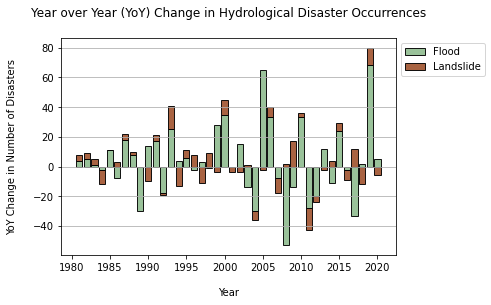

In [17]:
# YoY CHANGE IN HYDROLOGICAL DISASTER OCCURRENCE SINGLE BAR CHART

change_data = np.array([flood_disaster_change, landslide_disaster_change])

data_shape = np.shape(change_data)

# Take negative and positive data apart and cumulate
def get_cumulated_array(change_data, **kwargs):
    cum = change_data.clip(**kwargs)
    cum = np.cumsum(cum, axis=0)
    d = np.zeros(np.shape(change_data))
    d[1:] = cum[:-1]
    return d  

cumulated_data = get_cumulated_array(change_data, min=0)
cumulated_data_neg = get_cumulated_array(change_data, max=0)

# Re-merge negative and positive data.
row_mask = (change_data<0)
cumulated_data[row_mask] = cumulated_data_neg[row_mask]
data_stack = cumulated_data

cols = ["darkseagreen", "sienna"]
labs = ["Flood", "Landslide"]

fig = plt.figure()
ax = plt.subplot(111)

for i in np.arange(0, data_shape[0]):
    ax.bar(range(1981, 2021), change_data[i], bottom=data_stack[i], edgecolor = 'black', color=cols[i], alpha = 0.9, label = labs[i])

plt.grid(axis = 'y')

plt.title("Year over Year (YoY) Change in Hydrological Disaster Occurrences\n")
plt.xlabel("\nYear")
plt.ylabel("YoY Change in Number of Disasters\n")

lgd = plt.legend(bbox_to_anchor=(1,1), loc = 'upper left')

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Hydrological Disasters/hydrological figures/hydrologicalDisastersChangePerYearSBC.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

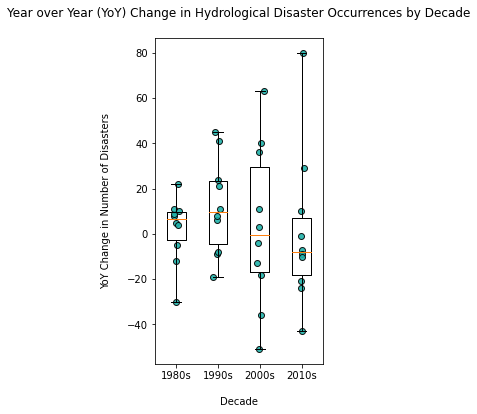

In [18]:
# YoY CHANGE IN HYDROLOGICAL DISASTER OCCURRENCE BOXPLOT

total_box_data = [hydrological_disaster_change[0:10], hydrological_disaster_change[10:20], hydrological_disaster_change[20:30], hydrological_disaster_change[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

x0 = [np.random.normal(1,0.04,10)]
x1 = [np.random.normal(2,0.04,10)]
x2 = [np.random.normal(3,0.04,10)]
x3 = [np.random.normal(4,0.04,10)]

plt.figure(figsize=(3,6))
plt.title("Year over Year (YoY) Change in Hydrological Disaster Occurrences by Decade\n")
plt.xlabel("\nDecade")
plt.ylabel("YoY Change in Number of Disasters\n")

plt.boxplot(total_box_data, labels = box_labels, whis = [0, 100])

plt.scatter(x0,total_box_data[0], color = 'lightseagreen', edgecolor = 'black', alpha = 0.9)
plt.scatter(x1,total_box_data[1], color = 'lightseagreen', edgecolor = 'black', alpha = 0.9)
plt.scatter(x2,total_box_data[2], color = 'lightseagreen', edgecolor = 'black', alpha = 0.9)
plt.scatter(x3,total_box_data[3], color = 'lightseagreen', edgecolor = 'black', alpha = 0.9)

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Hydrological Disasters/hydrological figures/hydrologicalDisastersChangePerYearBOX.png", bbox_inches='tight')

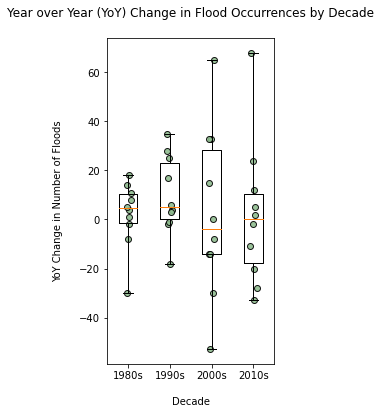

In [19]:
# YoY CHANGE IN FLOOD OCCURRENCES BOXPLOT

total_box_data = [flood_disaster_change[0:10], flood_disaster_change[10:20], flood_disaster_change[20:30], flood_disaster_change[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

x0 = [np.random.normal(1,0.04,10)]
x1 = [np.random.normal(2,0.04,10)]
x2 = [np.random.normal(3,0.04,10)]
x3 = [np.random.normal(4,0.04,10)]

plt.figure(figsize=(3,6))
plt.title("Year over Year (YoY) Change in Flood Occurrences by Decade\n")
plt.xlabel("\nDecade")
plt.ylabel("YoY Change in Number of Floods\n")

plt.boxplot(total_box_data, labels = box_labels, whis = [0, 100])

plt.scatter(x0,total_box_data[0], color = 'darkseagreen', edgecolor = 'black', alpha = 0.9)
plt.scatter(x1,total_box_data[1], color = 'darkseagreen', edgecolor = 'black', alpha = 0.9)
plt.scatter(x2,total_box_data[2], color = 'darkseagreen', edgecolor = 'black', alpha = 0.9)
plt.scatter(x3,total_box_data[3], color = 'darkseagreen', edgecolor = 'black', alpha = 0.9)

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Hydrological Disasters/hydrological figures/floodsChangePerYearBOX.png", bbox_inches='tight')

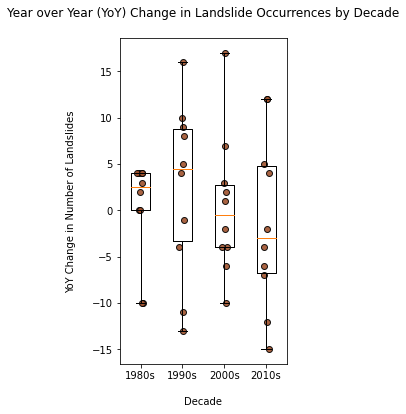

In [20]:
# YoY CHANGE IN LANDSLIDE OCCURRENCES BOXPLOT

total_box_data = [landslide_disaster_change[0:10], landslide_disaster_change[10:20], landslide_disaster_change[20:30], landslide_disaster_change[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

x0 = [np.random.normal(1,0.04,10)]
x1 = [np.random.normal(2,0.04,10)]
x2 = [np.random.normal(3,0.04,10)]
x3 = [np.random.normal(4,0.04,10)]

plt.figure(figsize=(3,6))
plt.title("Year over Year (YoY) Change in Landslide Occurrences by Decade\n")
plt.xlabel("\nDecade")
plt.ylabel("YoY Change in Number of Landslides\n")

plt.boxplot(total_box_data, labels = box_labels, whis = [0, 100])

plt.scatter(x0,total_box_data[0], color = 'sienna', edgecolor = 'black', alpha = 0.9)
plt.scatter(x1,total_box_data[1], color = 'sienna', edgecolor = 'black', alpha = 0.9)
plt.scatter(x2,total_box_data[2], color = 'sienna', edgecolor = 'black', alpha = 0.9)
plt.scatter(x3,total_box_data[3], color = 'sienna', edgecolor = 'black', alpha = 0.9)

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Hydrological Disasters/hydrological figures/landslidesChangePerYearBOX.png", bbox_inches='tight')

# YoY CHANGE IN HYDROLOGICAL DISASTER OCCURRENCES STATISTICS

In [21]:
# YoY CHANGE IN HYDROLOGICAL DISASTER OCCURRENCE STATISTICS

print("YoY CHANGE IN HYDROLOGICAL DISASTER OCCURRENCE STATISTICS")

# YoY change in hydrological disaster occurrence (total statistics)
print("\nYoY change in hydrological disaster occurrence (total statistics): ")
print(hydrological_disaster_change.describe())

# YoY change in hydrological disaster occurrence (1980s statistics)
print("\nYoY change in hydrological disaster occurrence (1980s statistics): ")
print(hydrological_disaster_change[0:10].describe())

# YoY change in hydrological disaster occurrence (1990s statistics)
print("\nYoY change in hydrological disaster occurrence (1990s statistics): ")
print(hydrological_disaster_change[10:20].describe())

# YoY change in hydrological disaster occurrence (2000s statistics)
print("\nYoY change in hydrological disaster occurrence (2000s statistics): ")
print(hydrological_disaster_change[20:30].describe())

# YoY change in hydrological disaster occurrence (2010s statistics)
print("\nYoY change in hydrological disaster occurrence (2010s statistics): ")
print(hydrological_disaster_change[30:40].describe())

print("\n")

# YoY CHANGE IN HYDROLOGICAL DISASTER OCCURRENCE STATISTICAL CHANGES (1980s-2010s)

print("YoY CHANGE IN HYDROLOGICAL DISASTER OCCURRENCE STATISTICAL CHANGES (1980s-2010s)\n")

# change in mean YoY change in natural disaster occurrence (1980s-2010s)
hydrological_occurrence_yoy_change_mean_1980s = hydrological_disaster_change[0:10].mean()
hydrological_occurrence_yoy_change_mean_2010s = hydrological_disaster_change[30:40].mean()
hydrological_occurrence_yoy_change_mean_percent_change_1980_to_2020 = 100*(hydrological_occurrence_yoy_change_mean_2010s-hydrological_occurrence_yoy_change_mean_1980s)/abs(hydrological_occurrence_yoy_change_mean_1980s)
print("Change in mean YoY change in hydrological disaster occurrence (1980s-2010s): {:.2f}%".format(hydrological_occurrence_yoy_change_mean_percent_change_1980_to_2020))

# change in maximum YoY change in natural disaster occurrence (1980s-2010s)
hydrological_occurrence_yoy_change_max_1980s = hydrological_disaster_change[0:10].max()
hydrological_occurrence_yoy_change_max_2010s = hydrological_disaster_change[30:40].max()
hydrological_occurrence_yoy_change_max_percent_change_1980_to_2020 = 100*(hydrological_occurrence_yoy_change_max_2010s-hydrological_occurrence_yoy_change_max_1980s)/abs(hydrological_occurrence_yoy_change_max_1980s)
print("Change in maximum YoY change in hydrological disaster occurrence (1980s-2010s): {:.2f}%".format(hydrological_occurrence_yoy_change_max_percent_change_1980_to_2020))

# change in minimum YoY change in natural disaster occurrence (1980s-2010s)
hydrological_occurrence_yoy_change_min_1980s = hydrological_disaster_change[0:10].min()
hydrological_occurrence_yoy_change_min_2010s = hydrological_disaster_change[30:40].min()
hydrological_occurrence_yoy_change_min_percent_change_1980_to_2020 = 100*(hydrological_occurrence_yoy_change_min_2010s-hydrological_occurrence_yoy_change_min_1980s)/abs(hydrological_occurrence_yoy_change_min_1980s)
print("Change in minimum YoY change in hydrological disaster occurrence (1980s-2010s): {:.2f}%".format(hydrological_occurrence_yoy_change_min_percent_change_1980_to_2020))

# change in standard deviation of YoY change in natural disaster occurrence (1980s-2010s)
hydrological_occurrence_yoy_change_std_1980s = hydrological_disaster_change[0:10].std()
hydrological_occurrence_yoy_change_std_2010s = hydrological_disaster_change[30:40].std()
hydrological_occurrence_yoy_change_std_percent_change_1980_to_2020 = 100*(hydrological_occurrence_yoy_change_std_2010s-hydrological_occurrence_yoy_change_std_1980s)/abs(hydrological_occurrence_yoy_change_std_1980s)
print("Change in standard deviation YoY change in hydrological disaster occurrence (1980s-2010s): {:.2f}%".format(hydrological_occurrence_yoy_change_std_percent_change_1980_to_2020))

YoY CHANGE IN HYDROLOGICAL DISASTER OCCURRENCE STATISTICS

YoY change in hydrological disaster occurrence (total statistics): 
count    40.000000
mean      4.425000
std      27.016507
min     -51.000000
25%     -10.500000
50%       4.500000
75%      13.500000
max      80.000000
dtype: float64

YoY change in hydrological disaster occurrence (1980s statistics): 
count    10.000000
mean      2.200000
std      14.573949
min     -30.000000
25%      -2.750000
50%       6.500000
75%       9.750000
max      22.000000
dtype: float64

YoY change in hydrological disaster occurrence (1990s statistics): 
count    10.000000
mean     12.000000
std      21.108187
min     -19.000000
25%      -4.500000
50%       9.500000
75%      23.250000
max      45.000000
dtype: float64

YoY change in hydrological disaster occurrence (2000s statistics): 
count    10.000000
mean      3.100000
std      35.441501
min     -51.000000
25%     -16.750000
50%      -0.500000
75%      29.750000
max      63.000000
dtype: float6

In [22]:
# YoY CHANGE IN FLOOD OCCURRENCE STATISTICS

print("YoY CHANGE IN FLOOD DISASTER OCCURRENCE STATISTICS")

# YoY change in flood occurrence (total statistics)
print("\nYoY change in flood occurrence (total statistics): ")
print(flood_disaster_change.describe())

# YoY change in flood occurrence (1980s statistics)
print("\nYoY change in flood occurrence (1980s statistics): ")
print(flood_disaster_change[0:10].describe())

# YoY change in flood occurrence (1990s statistics)
print("\nYoY change in flood occurrence (1990s statistics): ")
print(flood_disaster_change[10:20].describe())

# YoY change in flood occurrence (2000s statistics)
print("\nYoY change in flood occurrence (2000s statistics): ")
print(flood_disaster_change[20:30].describe())

# YoY change in flood occurrence (2010s statistics)
print("\nYoY change in flood occurrence (2010s statistics): ")
print(flood_disaster_change[30:40].describe())

print("\n")

# YoY CHANGE IN FLOOD OCCURRENCE STATISTICAL CHANGES (1980s-2010s)

print("YoY CHANGE IN FLOOD OCCURRENCE STATISTICAL CHANGES (1980s-2010s)\n")

# change in mean YoY change in flood occurrence (1980s-2010s)
flood_occurrence_yoy_change_mean_1980s = flood_disaster_change[0:10].mean()
flood_occurrence_yoy_change_mean_2010s = flood_disaster_change[30:40].mean()
flood_occurrence_yoy_change_mean_percent_change_1980_to_2020 = 100*(flood_occurrence_yoy_change_mean_2010s-flood_occurrence_yoy_change_mean_1980s)/abs(flood_occurrence_yoy_change_mean_1980s)
print("Change in mean YoY change in flood occurrence (1980s-2010s): {:.2f}%".format(flood_occurrence_yoy_change_mean_percent_change_1980_to_2020))

# change in maximum YoY change in flood occurrence (1980s-2010s)
flood_occurrence_yoy_change_max_1980s = flood_disaster_change[0:10].max()
flood_occurrence_yoy_change_max_2010s = flood_disaster_change[30:40].max()
flood_occurrence_yoy_change_max_percent_change_1980_to_2020 = 100*(flood_occurrence_yoy_change_max_2010s-flood_occurrence_yoy_change_max_1980s)/abs(flood_occurrence_yoy_change_max_1980s)
print("Change in maximum YoY change in flood occurrence (1980s-2010s): {:.2f}%".format(flood_occurrence_yoy_change_max_percent_change_1980_to_2020))

# change in minimum YoY change in flood occurrence (1980s-2010s)
flood_occurrence_yoy_change_min_1980s = flood_disaster_change[0:10].min()
flood_occurrence_yoy_change_min_2010s = flood_disaster_change[30:40].min()
flood_occurrence_yoy_change_min_percent_change_1980_to_2020 = 100*(flood_occurrence_yoy_change_min_2010s-flood_occurrence_yoy_change_min_1980s)/abs(flood_occurrence_yoy_change_min_1980s)
print("Change in minimum YoY change in flood occurrence (1980s-2010s): {:.2f}%".format(flood_occurrence_yoy_change_min_percent_change_1980_to_2020))

# change in standard deviation of YoY change in flood occurrence (1980s-2010s)
flood_occurrence_yoy_change_std_1980s = flood_disaster_change[0:10].std()
flood_occurrence_yoy_change_std_2010s = flood_disaster_change[30:40].std()
flood_occurrence_yoy_change_std_percent_change_1980_to_2020 = 100*(flood_occurrence_yoy_change_std_2010s-flood_occurrence_yoy_change_std_1980s)/abs(flood_occurrence_yoy_change_std_1980s)
print("Change in standard deviation YoY change in flood occurrence (1980s-2010s): {:.2f}%".format(flood_occurrence_yoy_change_std_percent_change_1980_to_2020))

YoY CHANGE IN FLOOD DISASTER OCCURRENCE STATISTICS

YoY change in flood occurrence (total statistics): 
count    40.000000
mean      4.050000
std      24.250773
min     -53.000000
25%      -8.750000
50%       3.500000
75%      15.500000
max      68.000000
dtype: float64

YoY change in flood occurrence (1980s statistics): 
count    10.000000
mean      2.100000
std      13.625548
min     -30.000000
25%      -1.250000
50%       4.500000
75%      10.250000
max      18.000000
dtype: float64

YoY change in flood occurrence (1990s statistics): 
count    10.000000
mean      9.700000
std      16.234736
min     -18.000000
25%       0.000000
50%       5.000000
75%      23.000000
max      35.000000
dtype: float64

YoY change in flood occurrence (2000s statistics): 
count    10.000000
mean      2.700000
std      34.512639
min     -53.000000
25%     -14.000000
50%      -4.000000
75%      28.500000
max      65.000000
dtype: float64

YoY change in flood occurrence (2010s statistics): 
count    10.0000

In [23]:
# YoY CHANGE IN LANDSLIDE OCCURRENCE STATISTICS

print("YoY CHANGE IN LANDSLIDE DISASTER OCCURRENCE STATISTICS")

# YoY change in landslide occurrence (total statistics)
print("\nYoY change in landslide occurrence (total statistics): ")
print(landslide_disaster_change.describe())

# YoY change in landslide occurrence (1980s statistics)
print("\nYoY change in landslide occurrence (1980s statistics): ")
print(landslide_disaster_change[0:10].describe())

# YoY change in landslide occurrence (1990s statistics)
print("\nYoY change in landslide occurrence (1990s statistics): ")
print(landslide_disaster_change[10:20].describe())

# YoY change in landslide occurrence (2000s statistics)
print("\nYoY change in landslide occurrence (2000s statistics): ")
print(landslide_disaster_change[20:30].describe())

# YoY change in landslide occurrence (2010s statistics)
print("\nYoY change in landslide occurrence (2010s statistics): ")
print(landslide_disaster_change[30:40].describe())

print("\n")

# YoY CHANGE IN LANDSLIDE OCCURRENCE STATISTICAL CHANGES (1980s-2010s)

print("YoY CHANGE IN LANDSLIDE OCCURRENCE STATISTICAL CHANGES (1980s-2010s)\n")

# change in mean YoY change in landslide occurrence (1980s-2010s)
landslide_occurrence_yoy_change_mean_1980s = landslide_disaster_change[0:10].mean()
landslide_occurrence_yoy_change_mean_2010s = landslide_disaster_change[30:40].mean()
landslide_occurrence_yoy_change_mean_percent_change_1980_to_2020 = 100*(landslide_occurrence_yoy_change_mean_2010s-landslide_occurrence_yoy_change_mean_1980s)/abs(landslide_occurrence_yoy_change_mean_1980s)
print("Change in mean YoY change in landslide occurrence (1980s-2010s): {:.2f}%".format(landslide_occurrence_yoy_change_mean_percent_change_1980_to_2020))

# change in maximum YoY change in landslide occurrence (1980s-2010s)
landslide_occurrence_yoy_change_max_1980s = landslide_disaster_change[0:10].max()
landslide_occurrence_yoy_change_max_2010s = landslide_disaster_change[30:40].max()
landslide_occurrence_yoy_change_max_percent_change_1980_to_2020 = 100*(landslide_occurrence_yoy_change_max_2010s-landslide_occurrence_yoy_change_max_1980s)/abs(landslide_occurrence_yoy_change_max_1980s)
print("Change in maximum YoY change in landslide occurrence (1980s-2010s): {:.2f}%".format(landslide_occurrence_yoy_change_max_percent_change_1980_to_2020))

# change in minimum YoY change in landslide occurrence (1980s-2010s)
landslide_occurrence_yoy_change_min_1980s = landslide_disaster_change[0:10].min()
landslide_occurrence_yoy_change_min_2010s = landslide_disaster_change[30:40].min()
landslide_occurrence_yoy_change_min_percent_change_1980_to_2020 = 100*(landslide_occurrence_yoy_change_min_2010s-landslide_occurrence_yoy_change_min_1980s)/abs(landslide_occurrence_yoy_change_min_1980s)
print("Change in minimum YoY change in landslide occurrence (1980s-2010s): {:.2f}%".format(landslide_occurrence_yoy_change_min_percent_change_1980_to_2020))

# change in standard deviation of YoY change in landslide occurrence (1980s-2010s)
landslide_occurrence_yoy_change_std_1980s = landslide_disaster_change[0:10].std()
landslide_occurrence_yoy_change_std_2010s = landslide_disaster_change[30:40].std()
landslide_occurrence_yoy_change_std_percent_change_1980_to_2020 = 100*(landslide_occurrence_yoy_change_std_2010s-landslide_occurrence_yoy_change_std_1980s)/abs(landslide_occurrence_yoy_change_std_1980s)
print("Change in standard deviation YoY change in landslide occurrence (1980s-2010s): {:.2f}%".format(landslide_occurrence_yoy_change_std_percent_change_1980_to_2020))

YoY CHANGE IN LANDSLIDE DISASTER OCCURRENCE STATISTICS

YoY change in landslide occurrence (total statistics): 
count    40.000000
mean      0.375000
std       7.921692
min     -15.000000
25%      -4.500000
50%       1.500000
75%       4.250000
max      17.000000
dtype: float64

YoY change in landslide occurrence (1980s statistics): 
count    10.000000
mean      0.100000
std       5.546771
min     -10.000000
25%       0.000000
50%       2.500000
75%       4.000000
max       4.000000
dtype: float64

YoY change in landslide occurrence (1990s statistics): 
count    10.000000
mean      2.300000
std       9.405081
min     -13.000000
25%      -3.250000
50%       4.500000
75%       8.750000
max      16.000000
dtype: float64

YoY change in landslide occurrence (2000s statistics): 
count    10.00000
mean      0.40000
std       7.61869
min     -10.00000
25%      -4.00000
50%      -0.50000
75%       2.75000
max      17.00000
dtype: float64

YoY change in landslide occurrence (2010s statistics): 


# HYDROLOGICAL DISASTER YEARLY DAMAGES ANALYSIS

In [24]:
flood_costs = flood_data[['Year', 'Total Damages']]
flood_costs = flood_costs.groupby('Year').sum()
flood_costs = flood_costs.squeeze()

landslide_costs = landslide_data[['Year', 'Total Damages']]
landslide_costs = landslide_costs.groupby('Year').sum()
landslide_costs = landslide_costs.squeeze()
landslide_costs = landslide_costs.sort_index()

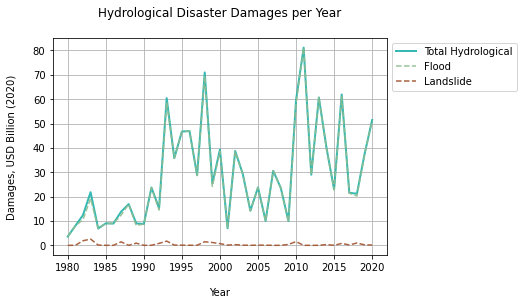

In [25]:
# HYDROLOGICAL DISASTER YEARLY DAMAGES SINGLE LINE PLOT

plt.grid(axis = 'both')
plt.title("Hydrological Disaster Damages per Year\n")
plt.xlabel("\nYear")
plt.ylabel("Damages, USD Billion (2020)\n")
plt.plot(hydrological_costs.index, hydrological_costs, linewidth=2, color = 'lightseagreen', alpha = 0.9, label = 'Total Hydrological')
plt.plot(flood_costs.index, flood_costs, linestyle = '--', color = 'darkseagreen', alpha = 0.9, label = 'Flood')
plt.plot(landslide_costs.index, landslide_costs, linestyle = '--', color = 'sienna', alpha = 0.9, label = 'Landslide')

lgd = plt.legend(bbox_to_anchor=(1,1), loc = 'upper left')

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Hydrological Disasters/hydrological figures/hydrologicalCostsPerYearSLP.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

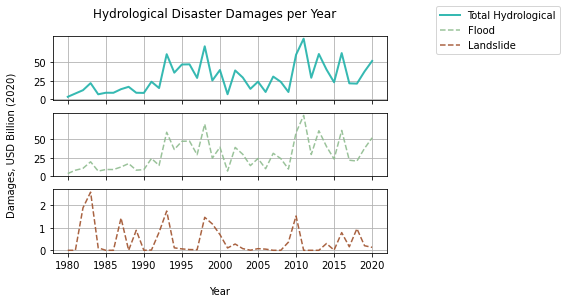

In [26]:
# HYDROLOGICAL DISASTER YEARLY DAMAGES MULTIPLE LINE PLOTS

fig, axs = plt.subplots(3, sharex = True)
fig.suptitle("Hydrological Disaster Damages per Year\n")
axs[1].set_ylabel("Damages, USD Billion (2020)\n")
axs[2].set_xlabel("\nYear")

axs[0].plot(hydrological_costs.index, hydrological_costs, linewidth=2, color = 'lightseagreen', alpha = 0.9, label = 'Total Hydrological')
axs[1].plot(flood_costs.index, flood_costs, linestyle = '--', color = 'darkseagreen', alpha = 0.9, label = 'Flood')
axs[2].plot(landslide_costs.index, landslide_costs, linestyle = '--', color = 'sienna', alpha = 0.9, label = 'Landslide')

plt.sca(axs[0])
plt.yticks(np.linspace(0,50,3))
plt.grid(axis = 'both')

plt.sca(axs[1])
plt.yticks(np.linspace(0,50,3))
plt.grid(axis = 'both')

plt.sca(axs[2])
plt.yticks(np.linspace(0,2,3))
plt.grid(axis = 'both')

lgd = fig.legend(bbox_to_anchor=(1,1), loc = 'upper left')

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Hydrological Disasters/hydrological figures/hydrologicalCostsPerYearMLP.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

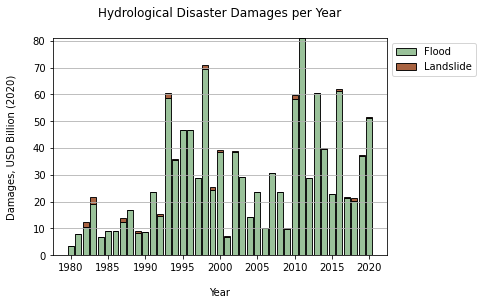

In [27]:
# HYDROLOGICAL DISASTER YEARLY DAMAGES SINGLE BAR CHART

plt.grid(axis = 'y')
plt.title("Hydrological Disaster Damages per Year\n")
plt.xlabel("\nYear")
plt.ylabel("Damages, USD Billion (2020)\n")

plt.bar(flood_costs.index, flood_costs, edgecolor = 'black', color = 'darkseagreen', alpha = 0.9, label = 'Flood')
plt.bar(landslide_costs.index, landslide_costs, bottom = flood_costs, edgecolor = 'black', color = 'sienna', alpha = 0.9, label = 'Landslide')

lgd = plt.legend(bbox_to_anchor=(1,1), loc = 'upper left')

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Hydrological Disasters/Hydrological figures/hydrologicalCostsPerYearSBC.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

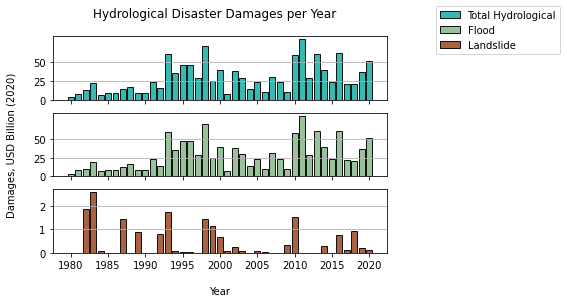

In [28]:
# HYDROLOGICAL DISASTER YEARLY DAMAGES MULTIPLE BAR CHARTS

fig, axs = plt.subplots(3, sharex = True)
fig.suptitle("Hydrological Disaster Damages per Year\n")
axs[1].set_ylabel("Damages, USD Billion (2020)\n")
axs[2].set_xlabel("\nYear")

axs[0].bar(hydrological_costs.index, hydrological_costs, edgecolor = 'black', color = 'lightseagreen', alpha = 0.9, label = 'Total Hydrological')
axs[1].bar(flood_costs.index, flood_costs, edgecolor = 'black', color = 'darkseagreen', alpha = 0.9, label = 'Flood')
axs[2].bar(landslide_costs.index, landslide_costs, edgecolor = 'black', color = 'sienna', alpha = 0.9, label = 'Landslide')

plt.sca(axs[0])
plt.yticks(np.linspace(0,50,3))
plt.grid(axis = 'y')

plt.sca(axs[1])
plt.yticks(np.linspace(0,50,3))
plt.grid(axis = 'y')

plt.sca(axs[2])
plt.yticks(np.linspace(0,2,3))
plt.grid(axis = 'y')

lgd = fig.legend(bbox_to_anchor=(1,1), loc = 'upper left')

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Hydrological Disasters/Hydrological figures/hydrologicalCostsPerYearMBC.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

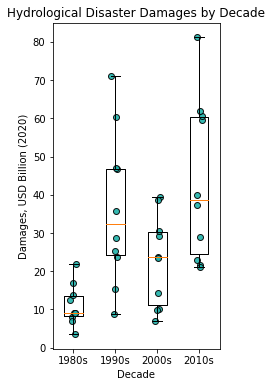

In [29]:
# HYDROLOGICAL DISASTER YEARLY DAMAGES BOXPLOT

hydrological_box_data = [hydrological_costs[0:10], hydrological_costs[10:20], hydrological_costs[20:30], hydrological_costs[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

plt.figure(figsize=(3,6))
plt.title("Hydrological Disaster Damages by Decade")
plt.xlabel("Decade")
plt.ylabel("Damages, USD Billion (2020)")

plt.boxplot(hydrological_box_data, labels = box_labels, whis = [0, 100])

plt.scatter(x0,hydrological_box_data[0], color = 'lightseagreen', edgecolor = 'black', alpha = 0.9)
plt.scatter(x1,hydrological_box_data[1], color = 'lightseagreen', edgecolor = 'black', alpha = 0.9)
plt.scatter(x2,hydrological_box_data[2], color = 'lightseagreen', edgecolor = 'black', alpha = 0.9)
plt.scatter(x3,hydrological_box_data[3], color = 'lightseagreen', edgecolor = 'black', alpha = 0.9)

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Hydrological Disasters/hydrological figures/hydrologicalCostsPerYearBOX.png", bbox_inches='tight')

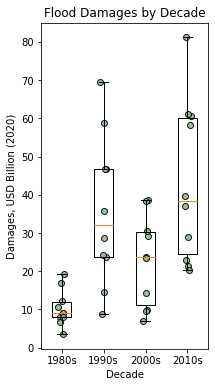

In [30]:
# FLOOD YEARLY DAMAGES BOXPLOT

flood_box_data = [flood_costs[0:10], flood_costs[10:20], flood_costs[20:30], flood_costs[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

plt.figure(figsize=(3,6))
plt.title("Flood Damages by Decade")
plt.xlabel("Decade")
plt.ylabel("Damages, USD Billion (2020)")

plt.boxplot(flood_box_data, labels = box_labels, whis = [0, 100])

plt.scatter(x0,flood_box_data[0], color = 'darkseagreen', edgecolor = 'black', alpha = 0.9)
plt.scatter(x1,flood_box_data[1], color = 'darkseagreen', edgecolor = 'black', alpha = 0.9)
plt.scatter(x2,flood_box_data[2], color = 'darkseagreen', edgecolor = 'black', alpha = 0.9)
plt.scatter(x3,flood_box_data[3], color = 'darkseagreen', edgecolor = 'black', alpha = 0.9)

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Hydrological Disasters/hydrological figures/floodCostsPerYearBOX.png", bbox_inches='tight')

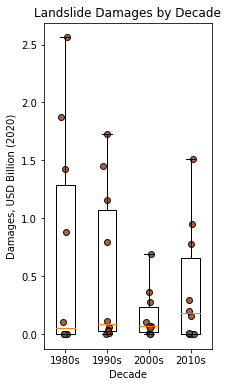

In [31]:
# LANDSLIDE YEARLY DAMAGES BOXPLOT

landslide_box_data = [landslide_costs[0:10], landslide_costs[10:20], landslide_costs[20:30], landslide_costs[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

plt.figure(figsize=(3,6))
plt.title("Landslide Damages by Decade")
plt.xlabel("Decade")
plt.ylabel("Damages, USD Billion (2020)")

plt.boxplot(landslide_box_data, labels = box_labels, whis = [0, 100])

plt.scatter(x0,landslide_box_data[0], color = 'sienna', edgecolor = 'black', alpha = 0.9)
plt.scatter(x1,landslide_box_data[1], color = 'sienna', edgecolor = 'black', alpha = 0.9)
plt.scatter(x2,landslide_box_data[2], color = 'sienna', edgecolor = 'black', alpha = 0.9)
plt.scatter(x3,landslide_box_data[3], color = 'sienna', edgecolor = 'black', alpha = 0.9)

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Hydrological Disasters/hydrological figures/landslideCostsPerYearBOX.png", bbox_inches='tight')

# HYDROLOGICAL DISASTER YEARLY DAMAGES STATISTICS

In [32]:
# HYDROLOGICAL DISASTER YEARLY DAMAGES STATISTICS

print("HYDROLOGICAL DISASTER YEARLY DAMAGES STATISTICS")

# hydrological disaster yearly damages (total statistics)
print("\nHydrological disaster yearly damages (total statistics): ")
print(hydrological_costs.describe())

# hydrological disaster yearly damages (1980s statistics)
print("\nHydrological disaster yearly damages (1980s statistics): ")
print(hydrological_costs[0:10].describe())

# hydrological disaster yearly damages (1990s statistics)
print("\nHydrological disaster yearly damages (1990s statistics): ")
print(hydrological_costs[10:20].describe())

# hydrological disaster yearly damages (2000s statistics)
print("\nHydrological disaster yearly damages (2000s statistics): ")
print(hydrological_costs[20:30].describe())

# hydrological disaster yearly damages (2010s statistics)
print("\nHydrological disaster yearly damages (2010s statistics): ")
print(hydrological_costs[30:40].describe())

print("\n")

# HYDROLOGICAL DISASTER YEARLY DAMAGES STATISTICAL CHANGES (1980s-2010s)

print("HYDROLOGICAL DISASTER YEARLY DAMAGES STATISTICAL CHANGES (1980s-2010s)\n")

# change in mean hydrological disaster yearly damages (1980s-2010s)
hydrological_damages_mean_1980s = hydrological_costs[0:10].mean()
hydrological_damages_mean_2010s = hydrological_costs[30:40].mean()
hydrological_damages_mean_percent_change_1980_to_2020 = 100*(hydrological_damages_mean_2010s-hydrological_damages_mean_1980s)/abs(hydrological_damages_mean_1980s)
print("Change in mean hydrological disaster yearly damages (1980s-2010s): {:.2f}%".format(hydrological_damages_mean_percent_change_1980_to_2020))

# change in maximum hydrological disaster yearly damages (1980s-2010s)
hydrological_damages_max_1980s = hydrological_costs[0:10].max()
hydrological_damages_max_2010s = hydrological_costs[30:40].max()
hydrological_damages_max_percent_change_1980_to_2020 = 100*(hydrological_damages_max_2010s-hydrological_damages_max_1980s)/abs(hydrological_damages_max_1980s)
print("Change in maximum hydrological disaster yearly damages (1980s-2010s): {:.2f}%".format(hydrological_damages_max_percent_change_1980_to_2020))

# change in minimum hydrological disaster yearly damages (1980s-2010s)
hydrological_damages_min_1980s = hydrological_costs[0:10].min()
hydrological_damages_min_2010s = hydrological_costs[30:40].min()
hydrological_damages_min_percent_change_1980_to_2020 = 100*(hydrological_damages_min_2010s-hydrological_damages_min_1980s)/abs(hydrological_damages_min_1980s)
print("Change in minimum hydrological disaster yearly damages (1980s-2010s): {:.2f}%".format(hydrological_damages_min_percent_change_1980_to_2020))

# change in standard deviation of hydrological disaster yearly damages (1980s-2010s)
hydrological_damages_std_1980s = hydrological_costs[0:10].std()
hydrological_damages_std_2010s = hydrological_costs[30:40].std()
hydrological_damages_std_percent_change_1980_to_2020 = 100*(hydrological_damages_std_2010s-hydrological_damages_std_1980s)/abs(hydrological_damages_std_1980s)
print("Change in standard deviation of hydrological disaster yearly damages (1980s-2010s): {:.2f}%\n".format(hydrological_damages_std_percent_change_1980_to_2020))

HYDROLOGICAL DISASTER YEARLY DAMAGES STATISTICS

Hydrological disaster yearly damages (total statistics): 
count    41.000000
mean     28.939986
std      19.893487
min       3.587959
25%      12.411392
50%      23.724374
75%      39.351711
max      81.156760
Name: Total Damages, dtype: float64

Hydrological disaster yearly damages (1980s statistics): 
count    10.000000
mean     11.039503
std       5.314683
min       3.587959
25%       8.247975
50%       9.000335
75%      13.424207
max      21.817150
Name: Total Damages, dtype: float64

Hydrological disaster yearly damages (1990s statistics): 
count    10.000000
mean     36.266969
std      19.837327
min       8.769764
25%      24.128325
50%      32.281213
75%      46.857171
max      70.976227
Name: Total Damages, dtype: float64

Hydrological disaster yearly damages (2000s statistics): 
count    10.000000
mean     22.655621
std      11.939889
min       7.027196
25%      11.077572
50%      23.643441
75%      30.278567
max      39.351711


In [33]:
# FLOOD YEARLY DAMAGES STATISTICS

print("FLOOD YEARLY DAMAGES STATISTICS")

# flood yearly damages (total statistics)
print("\nFlood yearly damages (total statistics): ")
print(flood_costs.describe())

# flood yearly damages (1980s statistics)
print("\nFlood yearly damages (1980s statistics): ")
print(flood_costs[0:10].describe())

# flood yearly damages (1990s statistics)
print("\nFlood yearly damages (1990s statistics): ")
print(flood_costs[10:20].describe())

# flood yearly damages (2000s statistics)
print("\nFlood disaster yearly damages (2000s statistics): ")
print(flood_costs[20:30].describe())

# flood yearly damages (2010s statistics)
print("\nFlood yearly damages (2010s statistics): ")
print(flood_costs[30:40].describe())

print("\n")

# FLOOD YEARLY DAMAGES STATISTICAL CHANGES (1980s-2010s)

print("FLOOD YEARLY DAMAGES STATISTICAL CHANGES (1980s-2010s)\n")

# change in mean flood yearly damages (1980s-2010s)
flood_damages_mean_1980s = flood_costs[0:10].mean()
flood_damages_mean_2010s = flood_costs[30:40].mean()
flood_damages_mean_percent_change_1980_to_2020 = 100*(flood_damages_mean_2010s-flood_damages_mean_1980s)/abs(flood_damages_mean_1980s)
print("Change in mean flood yearly damages (1980s-2010s): {:.2f}%".format(flood_damages_mean_percent_change_1980_to_2020))

# change in maximum flood yearly damages (1980s-2010s)
flood_damages_max_1980s = flood_costs[0:10].max()
flood_damages_max_2010s = flood_costs[30:40].max()
flood_damages_max_percent_change_1980_to_2020 = 100*(flood_damages_max_2010s-flood_damages_max_1980s)/abs(flood_damages_max_1980s)
print("Change in maximum flood yearly damages (1980s-2010s): {:.2f}%".format(flood_damages_max_percent_change_1980_to_2020))

# change in minimum flood yearly damages (1980s-2010s)
flood_damages_min_1980s = flood_costs[0:10].min()
flood_damages_min_2010s = flood_costs[30:40].min()
flood_damages_min_percent_change_1980_to_2020 = 100*(flood_damages_min_2010s-flood_damages_min_1980s)/abs(flood_damages_min_1980s)
print("Change in minimum flood yearly damages (1980s-2010s): {:.2f}%".format(flood_damages_min_percent_change_1980_to_2020))

# change in standard deviation of flood yearly damages (1980s-2010s)
flood_damages_std_1980s = flood_costs[0:10].std()
flood_damages_std_2010s = flood_costs[30:40].std()
flood_damages_std_percent_change_1980_to_2020 = 100*(flood_damages_std_2010s-flood_damages_std_1980s)/abs(flood_damages_std_1980s)
print("Change in standard deviation of flood yearly damages (1980s-2010s): {:.2f}%\n".format(flood_damages_std_percent_change_1980_to_2020))

FLOOD YEARLY DAMAGES STATISTICS

Flood yearly damages (total statistics): 
count    41.000000
mean     28.503643
std      19.799449
min       3.587959
25%      10.539654
50%      23.701372
75%      38.659530
max      81.156760
Name: Total Damages, dtype: float64

Flood yearly damages (1980s statistics): 
count    10.000000
mean     10.355289
std       4.699940
min       3.587959
25%       8.038114
50%       8.979506
75%      11.890500
max      19.255673
Name: Total Damages, dtype: float64

Flood yearly damages (1990s statistics): 
count    10.000000
mean     35.729041
std      19.490569
min       8.769764
25%      23.829184
50%      32.213897
75%      46.817140
max      69.522292
Name: Total Damages, dtype: float64

Flood disaster yearly damages (2000s statistics): 
count    10.000000
mean     22.492383
std      11.851199
min       6.924335
25%      11.037844
50%      23.607109
75%      30.260350
max      38.659530
Name: Total Damages, dtype: float64

Flood yearly damages (2010s statis

In [34]:
# LANDSLIDE YEARLY DAMAGES STATISTICS

print("LANDSLIDE YEARLY DAMAGES STATISTICS")

# landslide yearly damages (total statistics)
print("\nLandslide yearly damages (total statistics): ")
print(landslide_costs.describe())

# landslide yearly damages (1980s statistics)
print("\nLandslide yearly damages (1980s statistics): ")
print(landslide_costs[0:10].describe())

# landslide yearly damages (1990s statistics)
print("\nLandslide yearly damages (1990s statistics): ")
print(landslide_costs[10:20].describe())

# landslide yearly damages (2000s statistics)
print("\nLandslide disaster yearly damages (2000s statistics): ")
print(landslide_costs[20:30].describe())

# landslide yearly damages (2010s statistics)
print("\nLandslide yearly damages (2010s statistics): ")
print(landslide_costs[30:40].describe())

print("\n")

# LANDSLIDE YEARLY DAMAGES STATISTICAL CHANGES (1980s-2010s)

print("LANDSLIDE YEARLY DAMAGES STATISTICAL CHANGES (1980s-2010s)\n")

# change in mean landslide yearly damages (1980s-2010s)
landslide_damages_mean_1980s = landslide_costs[0:10].mean()
landslide_damages_mean_2010s = landslide_costs[30:40].mean()
landslide_damages_mean_percent_change_1980_to_2020 = 100*(landslide_damages_mean_2010s-landslide_damages_mean_1980s)/abs(landslide_damages_mean_1980s)
print("Change in mean landslide yearly damages (1980s-2010s): {:.2f}%".format(landslide_damages_mean_percent_change_1980_to_2020))

# change in maximum landslide yearly damages (1980s-2010s)
landslide_damages_max_1980s = landslide_costs[0:10].max()
landslide_damages_max_2010s = landslide_costs[30:40].max()
landslide_damages_max_percent_change_1980_to_2020 = 100*(landslide_damages_max_2010s-landslide_damages_max_1980s)/abs(landslide_damages_max_1980s)
print("Change in maximum landslide yearly damages (1980s-2010s): {:.2f}%".format(landslide_damages_max_percent_change_1980_to_2020))

# change in minimum landslide yearly damages (1980s-2010s)
landslide_damages_min_1980s = landslide_costs[0:10].min()
landslide_damages_min_2010s = landslide_costs[30:40].min()
landslide_damages_min_percent_change_1980_to_2020 = 100*(landslide_damages_min_2010s-landslide_damages_min_1980s)/abs(landslide_damages_min_1980s)
print("Change in minimum landslide yearly damages (1980s-2010s): {:.2f}%".format(landslide_damages_min_percent_change_1980_to_2020))

# change in standard deviation of landslide yearly damages (1980s-2010s)
landslide_damages_std_1980s = landslide_costs[0:10].std()
landslide_damages_std_2010s = landslide_costs[30:40].std()
landslide_damages_std_percent_change_1980_to_2020 = 100*(landslide_damages_std_2010s-landslide_damages_std_1980s)/abs(landslide_damages_std_1980s)
print("Change in standard deviation of landslide yearly damages (1980s-2010s): {:.2f}%\n".format(landslide_damages_std_percent_change_1980_to_2020))

LANDSLIDE YEARLY DAMAGES STATISTICS

Landslide yearly damages (total statistics): 
count    41.000000
mean      0.436343
std       0.648907
min       0.000000
25%       0.000000
50%       0.102861
75%       0.779302
max       2.561477
Name: Total Damages, dtype: float64

Landslide yearly damages (1980s statistics): 
count    10.000000
mean      0.684214
std       0.953948
min       0.000000
25%       0.000000
50%       0.053397
75%       1.286048
max       2.561477
Name: Total Damages, dtype: float64

Landslide yearly damages (1990s statistics): 
count    10.000000
mean      0.537929
std       0.683654
min       0.000000
25%       0.027872
50%       0.084935
75%       1.068765
max       1.729594
Name: Total Damages, dtype: float64

Landslide disaster yearly damages (2000s statistics): 
count    10.000000
mean      0.163238
std       0.221607
min       0.000000
25%       0.016430
50%       0.072766
75%       0.232784
max       0.692181
Name: Total Damages, dtype: float64

Landslide year

C:\Users\Felix\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in double_scalars


# YoY CHANGE IN HYDROLOGICAL DISASTER DAMAGES ANALYSIS

In [35]:
# CALCULATE YoY CHANGE IN DISASTER COSTS

hydrological_costs_change = [hydrological_costs[i+1]-hydrological_costs[i] for i in range(1980,2020)]
hydrological_costs_change = pd.Series(hydrological_costs_change)

flood_costs_change = [flood_costs[i+1]-flood_costs[i] for i in range(1980,2020)]
flood_costs_change = pd.Series(flood_costs_change)

landslide_costs_change = [landslide_costs[i+1]-landslide_costs[i] for i in range(1980,2020)]
landslide_costs_change = pd.Series(landslide_costs_change)

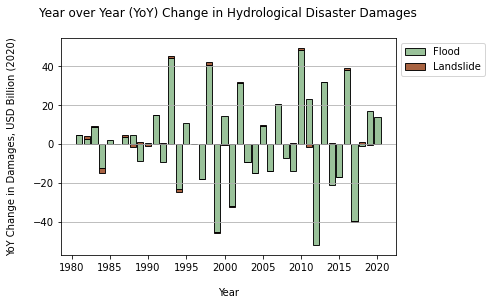

In [36]:
# YoY CHANGE IN HYDROLOGICAL DISASTER DAMAGES SINGLE BAR CHART

costs_change_data = np.array([flood_costs_change, landslide_costs_change])

data_shape = np.shape(costs_change_data)

# Take negative and positive data apart and cumulate
def get_cumulated_array(costs_change_data, **kwargs):
    cum = costs_change_data.clip(**kwargs)
    cum = np.cumsum(cum, axis=0)
    d = np.zeros(np.shape(costs_change_data))
    d[1:] = cum[:-1]
    return d  

cumulated_data = get_cumulated_array(costs_change_data, min=0)
cumulated_data_neg = get_cumulated_array(costs_change_data, max=0)

# Re-merge negative and positive data.
row_mask = (costs_change_data<0)
cumulated_data[row_mask] = cumulated_data_neg[row_mask]
data_stack = cumulated_data

cols = ["darkseagreen", "sienna"]
labs = ["Flood", "Landslide"]

#fig = plt.figure(figsize=(5,20))
ax = plt.subplot(111)

for i in np.arange(0, data_shape[0]):
    ax.bar(range(1981, 2021), costs_change_data[i], bottom=data_stack[i], edgecolor = 'black', color=cols[i], alpha = 0.9, label = labs[i])

plt.grid(axis = 'y')

plt.title("Year over Year (YoY) Change in Hydrological Disaster Damages\n")
plt.xlabel("\nYear")
plt.ylabel("YoY Change in Damages, USD Billion (2020)\n")

lgd = plt.legend(bbox_to_anchor=(1,1), loc = 'upper left')

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Hydrological Disasters/hydrological figures/hydrologicalCostsChangePerYearSBC.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

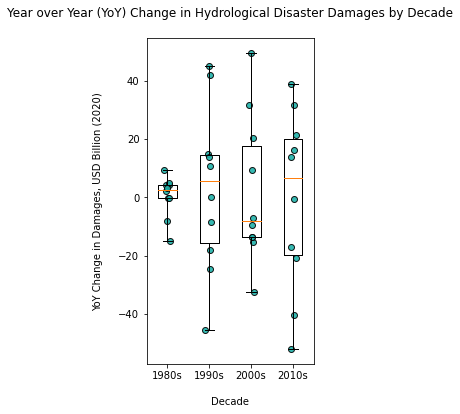

In [37]:
# YoY CHANGE IN HYDROLOGICAL DISASTER DAMAGES BOXPLOT

total_box_cost_data = [hydrological_costs_change[0:10], hydrological_costs_change[10:20], hydrological_costs_change[20:30], hydrological_costs_change[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

plt.figure(figsize=(3,6))
plt.title("Year over Year (YoY) Change in Hydrological Disaster Damages by Decade\n")
plt.xlabel("\nDecade")
plt.ylabel("YoY Change in Damages, USD Billion (2020)\n")

plt.boxplot(total_box_cost_data, labels = box_labels, whis = [0, 100])

plt.scatter(x0,total_box_cost_data[0], color = 'lightseagreen', edgecolor = 'black', alpha = 0.9)
plt.scatter(x1,total_box_cost_data[1], color = 'lightseagreen', edgecolor = 'black', alpha = 0.9)
plt.scatter(x2,total_box_cost_data[2], color = 'lightseagreen', edgecolor = 'black', alpha = 0.9)
plt.scatter(x3,total_box_cost_data[3], color = 'lightseagreen', edgecolor = 'black', alpha = 0.9)

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Hydrological Disasters/hydrological figures/hydrologicalCostsChangePerYearBOX.png", bbox_inches='tight')


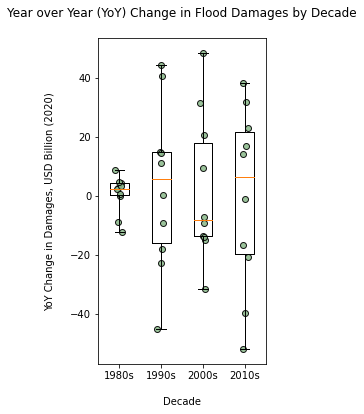

In [38]:
# YoY CHANGE IN FLOOD DAMAGES BOXPLOT

total_box_cost_data = [flood_costs_change[0:10], flood_costs_change[10:20], flood_costs_change[20:30], flood_costs_change[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

plt.figure(figsize=(3,6))
plt.title("Year over Year (YoY) Change in Flood Damages by Decade\n")
plt.xlabel("\nDecade")
plt.ylabel("YoY Change in Damages, USD Billion (2020)\n")

plt.boxplot(total_box_cost_data, labels = box_labels, whis = [0, 100])

plt.scatter(x0,total_box_cost_data[0], color = 'darkseagreen', edgecolor = 'black', alpha = 0.9)
plt.scatter(x1,total_box_cost_data[1], color = 'darkseagreen', edgecolor = 'black', alpha = 0.9)
plt.scatter(x2,total_box_cost_data[2], color = 'darkseagreen', edgecolor = 'black', alpha = 0.9)
plt.scatter(x3,total_box_cost_data[3], color = 'darkseagreen', edgecolor = 'black', alpha = 0.9)

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Hydrological Disasters/hydrological figures/floodCostsChangePerYearBOX.png", bbox_inches='tight')


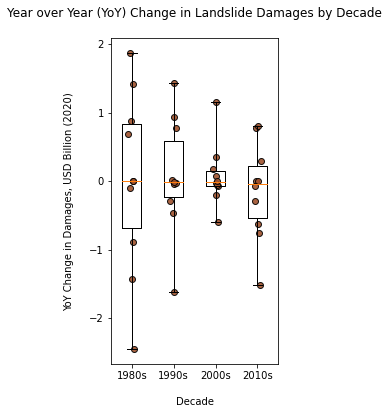

In [39]:
# YoY CHANGE IN LANDSLIDE DAMAGES BOXPLOT

total_box_cost_data = [landslide_costs_change[0:10], landslide_costs_change[10:20], landslide_costs_change[20:30], landslide_costs_change[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

plt.figure(figsize=(3,6))
plt.title("Year over Year (YoY) Change in Landslide Damages by Decade\n")
plt.xlabel("\nDecade")
plt.ylabel("YoY Change in Damages, USD Billion (2020)\n")

plt.boxplot(total_box_cost_data, labels = box_labels, whis = [0, 100])

plt.scatter(x0,total_box_cost_data[0], color = 'sienna', edgecolor = 'black', alpha = 0.9)
plt.scatter(x1,total_box_cost_data[1], color = 'sienna', edgecolor = 'black', alpha = 0.9)
plt.scatter(x2,total_box_cost_data[2], color = 'sienna', edgecolor = 'black', alpha = 0.9)
plt.scatter(x3,total_box_cost_data[3], color = 'sienna', edgecolor = 'black', alpha = 0.9)

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/hydrological Disasters/hydrological figures/landslideCostsChangePerYearBOX.png", bbox_inches='tight')


# YoY CHANGE IN HYDROLOGICAL DISASTER DAMAGES STATISTICS

In [40]:
# YoY CHANGE IN HYDROLOGICAL DISASTER DAMAGES STATISTICS

print("YoY CHANGE IN HYDROLOGICAL DISASTER DAMAGES STATISTICS")

# YoY change in hydrological disaster damages (total statistics)
print("\nYoY change in hydrological disaster damages (total statistics): ")
print(hydrological_costs_change.describe())

# YoY change in hydrological disaster damages (1980s statistics)
print("\nYoY change in hydrological disaster damages (1980s statistics): ")
print(hydrological_costs_change[0:10].describe())

# YoY change in hydrological disaster damages (1990s statistics)
print("\nYoY change in hydrological disaster damages (1990s statistics): ")
print(hydrological_costs_change[10:20].describe())

# YoY change in hydrological disaster damages (2000s statistics)
print("\nYoY change in hydrological disaster damages (2000s statistics): ")
print(hydrological_costs_change[20:30].describe())

# YoY change in hydrological disaster damages (2010s statistics)
print("\nYoY change in hydrological disaster damages (2010s statistics): ")
print(hydrological_costs_change[30:40].describe())

print("\n")

# YoY CHANGE IN HYDROLOGICAL DISASTER DAMAGES STATISTICAL CHANGES (1980s-2010s)

print("YoY CHANGE IN HYDROLOGICAL DISASTER DAMAGES STATISTICAL CHANGES (1980s-2010s)\n")

# change in mean YoY change in hydrological disasters damages (1980s-2010s)
hydrological_damages_yoy_change_mean_1980s = hydrological_costs_change[0:10].mean()
hydrological_damages_yoy_change_mean_2010s = hydrological_costs_change[30:40].mean()
hydrological_damages_yoy_change_mean_percent_change_1980_to_2020 = 100*(hydrological_damages_yoy_change_mean_2010s-hydrological_damages_yoy_change_mean_1980s)/abs(hydrological_damages_yoy_change_mean_1980s)
print("Change in mean YoY change in hydrological disasters damages (1980s-2010s): {:.2f}%".format(hydrological_damages_yoy_change_mean_percent_change_1980_to_2020))

# change in maximum YoY change in hydrological disasters damages (1980s-2010s)
hydrological_damages_yoy_change_max_1980s = hydrological_costs_change[0:10].max()
hydrological_damages_yoy_change_max_2010s = hydrological_costs_change[30:40].max()
hydrological_damages_yoy_change_max_percent_change_1980_to_2020 = 100*(hydrological_damages_yoy_change_max_2010s-hydrological_damages_yoy_change_max_1980s)/abs(hydrological_damages_yoy_change_max_1980s)
print("Change in maximum YoY change in hydrological disasters damages (1980s-2010s): {:.2f}%".format(hydrological_damages_yoy_change_max_percent_change_1980_to_2020))

# change in minimum YoY change in hydrological disasters damages (1980s-2010s)
hydrological_damages_yoy_change_min_1980s = hydrological_costs_change[0:10].min()
hydrological_damages_yoy_change_min_2010s = hydrological_costs_change[30:40].min()
hydrological_damages_yoy_change_min_percent_change_1980_to_2020 = 100*(hydrological_damages_yoy_change_min_2010s-hydrological_damages_yoy_change_min_1980s)/abs(hydrological_damages_yoy_change_min_1980s)
print("Change in minimum YoY change in hydrological disasters damages (1980s-2010s): {:.2f}%".format(hydrological_damages_yoy_change_min_percent_change_1980_to_2020))

# change in standard deviation of YoY change in hydrological disasters damages (1980s-2010s)
hydrological_damages_yoy_change_std_1980s = hydrological_costs_change[0:10].std()
hydrological_damages_yoy_change_std_2010s = hydrological_costs_change[30:40].std()
hydrological_damages_yoy_change_std_percent_change_1980_to_2020 = 100*(hydrological_damages_yoy_change_std_2010s-hydrological_damages_yoy_change_std_1980s)/abs(hydrological_damages_yoy_change_std_1980s)
print("Change in standard deviation of YoY change in hydrological disasters damages (1980s-2010s): {:.2f}%".format(hydrological_damages_yoy_change_std_percent_change_1980_to_2020))

YoY CHANGE IN HYDROLOGICAL DISASTER DAMAGES STATISTICS

YoY change in hydrological disaster damages (total statistics): 
count    40.000000
mean      1.195821
std      23.821076
min     -52.173170
25%     -14.020095
50%       1.133629
75%      14.280540
max      49.659324
dtype: float64

YoY change in hydrological disaster damages (1980s statistics): 
count    10.000000
mean      0.518181
std       7.043588
min     -14.881723
25%      -0.180784
50%       2.615512
75%       4.419122
max       9.405757
dtype: float64

YoY change in hydrological disaster damages (1990s statistics): 
count    10.000000
mean      3.058195
std      28.593472
min     -45.636047
25%     -15.720767
50%       5.555693
75%      14.718840
max      45.176300
dtype: float64

YoY change in hydrological disaster damages (2000s statistics): 
count    10.000000
mean      2.029210
std      25.232839
min     -32.324515
25%     -13.681753
50%      -8.248378
75%      17.810961
max      49.659324
dtype: float64

YoY change i

In [41]:
# YoY CHANGE IN FLOOD DAMAGES STATISTICS

print("YoY CHANGE IN FLOOD DAMAGES STATISTICS")

# YoY change in flood damages (total statistics)
print("\nYoY change in flood damages (total statistics): ")
print(flood_costs_change.describe())

# YoY change in flood damages (1980s statistics)
print("\nYoY change in flood damages (1980s statistics): ")
print(flood_costs_change[0:10].describe())

# YoY change in flood damages (1990s statistics)
print("\nYoY change in flood damages (1990s statistics): ")
print(flood_costs_change[10:20].describe())

# YoY change in flood damages (2000s statistics)
print("\nYoY change in flood damages (2000s statistics): ")
print(flood_costs_change[20:30].describe())

# YoY change in flood damages (2010s statistics)
print("\nYoY change in flood damages (2010s statistics): ")
print(flood_costs_change[30:40].describe())

print("\n")

# YoY CHANGE IN FLOOD DAMAGES STATISTICAL CHANGES (1980s-2010s)

print("YoY CHANGE IN FLOOD DAMAGES STATISTICAL CHANGES (1980s-2010s)\n")

# change in mean YoY change in flood damages (1980s-2010s)
flood_damages_yoy_change_mean_1980s = flood_costs_change[0:10].mean()
flood_damages_yoy_change_mean_2010s = flood_costs_change[30:40].mean()
flood_damages_yoy_change_mean_percent_change_1980_to_2020 = 100*(flood_damages_yoy_change_mean_2010s-flood_damages_yoy_change_mean_1980s)/abs(flood_damages_yoy_change_mean_1980s)
print("Change in mean YoY change in flood damages (1980s-2010s): {:.2f}%".format(flood_damages_yoy_change_mean_percent_change_1980_to_2020))

# change in maximum YoY change in flood damages (1980s-2010s)
flood_damages_yoy_change_max_1980s = flood_costs_change[0:10].max()
flood_damages_yoy_change_max_2010s = flood_costs_change[30:40].max()
flood_damages_yoy_change_max_percent_change_1980_to_2020 = 100*(flood_damages_yoy_change_max_2010s-flood_damages_yoy_change_max_1980s)/abs(flood_damages_yoy_change_max_1980s)
print("Change in maximum YoY change in flood damages (1980s-2010s): {:.2f}%".format(flood_damages_yoy_change_max_percent_change_1980_to_2020))

# change in minimum YoY change in flood damages (1980s-2010s)
flood_damages_yoy_change_min_1980s = flood_costs_change[0:10].min()
flood_damages_yoy_change_min_2010s = flood_costs_change[30:40].min()
flood_damages_yoy_change_min_percent_change_1980_to_2020 = 100*(flood_damages_yoy_change_min_2010s-flood_damages_yoy_change_min_1980s)/abs(flood_damages_yoy_change_min_1980s)
print("Change in minimum YoY change in flood damages (1980s-2010s): {:.2f}%".format(flood_damages_yoy_change_min_percent_change_1980_to_2020))

# change in standard deviation of YoY change in flood damages (1980s-2010s)
flood_damages_yoy_change_std_1980s = flood_costs_change[0:10].std()
flood_damages_yoy_change_std_2010s = flood_costs_change[30:40].std()
flood_damages_yoy_change_std_percent_change_1980_to_2020 = 100*(flood_damages_yoy_change_std_2010s-flood_damages_yoy_change_std_1980s)/abs(flood_damages_yoy_change_std_1980s)
print("Change in standard deviation of YoY change in flood damages (1980s-2010s): {:.2f}%".format(flood_damages_yoy_change_std_percent_change_1980_to_2020))

YoY CHANGE IN FLOOD DAMAGES STATISTICS

YoY change in flood damages (total statistics): 
count    40.000000
mean      1.192581
std      23.537065
min     -52.173170
25%     -13.755678
50%       1.421353
75%      14.595281
max      48.508015
dtype: float64

YoY change in flood damages (1980s statistics): 
count    10.000000
mean      0.518181
std       6.402572
min     -12.427041
25%       0.118596
50%       2.353553
75%       4.167981
max       8.716019
dtype: float64

YoY change in flood damages (1990s statistics): 
count    10.000000
mean      2.988977
std      28.055577
min     -45.342307
25%     -15.911330
50%       5.593462
75%      14.826751
max      44.241181
dtype: float64

YoY change in flood damages (2000s statistics): 
count    10.000000
mean      1.947342
std      24.890950
min     -31.735194
25%     -13.843835
50%      -8.146766
75%      17.832523
max      48.508015
dtype: float64

YoY change in flood damages (2010s statistics): 
count    10.000000
mean     -0.684175
std  

In [42]:
# YoY CHANGE IN LANDSLIDE DAMAGES STATISTICS

print("YoY CHANGE IN LANDSLIDE DAMAGES STATISTICS")

# YoY change in landslide damages (total statistics)
print("\nYoY change in landslide damages (total statistics): ")
print(landslide_costs_change.describe())

# YoY change in landslide damages (1980s statistics)
print("\nYoY change in landslide damages (1980s statistics): ")
print(landslide_costs_change[0:10].describe())

# YoY change in landslide damages (1990s statistics)
print("\nYoY change in landslide damages (1990s statistics): ")
print(landslide_costs_change[10:20].describe())

# YoY change in landslide damages (2000s statistics)
print("\nYoY change in landslide damages (2000s statistics): ")
print(landslide_costs_change[20:30].describe())

# YoY change in landslide damages (2010s statistics)
print("\nYoY change in landslide damages (2010s statistics): ")
print(landslide_costs_change[30:40].describe())

print("\n")

# YoY CHANGE IN LANDSLIDE DAMAGES STATISTICAL CHANGES (1980s-2010s)

print("YoY CHANGE IN LANDSLIDE DAMAGES STATISTICAL CHANGES (1980s-2010s)\n")

# change in mean YoY change in landslide damages (1980s-2010s)
landslide_damages_yoy_change_mean_1980s = landslide_costs_change[0:10].mean()
landslide_damages_yoy_change_mean_2010s = landslide_costs_change[30:40].mean()
landslide_damages_yoy_change_mean_percent_change_1980_to_2020 = 100*(landslide_damages_yoy_change_mean_2010s-landslide_damages_yoy_change_mean_1980s)/abs(landslide_damages_yoy_change_mean_1980s)
print("Change in mean YoY change in landslide damages (1980s-2010s): {:.2f}%".format(landslide_damages_yoy_change_mean_percent_change_1980_to_2020))

# change in maximum YoY change in landslide damages (1980s-2010s)
landslide_damages_yoy_change_max_1980s = landslide_costs_change[0:10].max()
landslide_damages_yoy_change_max_2010s = landslide_costs_change[30:40].max()
landslide_damages_yoy_change_max_percent_change_1980_to_2020 = 100*(landslide_damages_yoy_change_max_2010s-landslide_damages_yoy_change_max_1980s)/abs(landslide_damages_yoy_change_max_1980s)
print("Change in maximum YoY change in landslide damages (1980s-2010s): {:.2f}%".format(landslide_damages_yoy_change_max_percent_change_1980_to_2020))

# change in minimum YoY change in landslide damages (1980s-2010s)
landslide_damages_yoy_change_min_1980s = landslide_costs_change[0:10].min()
landslide_damages_yoy_change_min_2010s = landslide_costs_change[30:40].min()
landslide_damages_yoy_change_min_percent_change_1980_to_2020 = 100*(landslide_damages_yoy_change_min_2010s-landslide_damages_yoy_change_min_1980s)/abs(landslide_damages_yoy_change_min_1980s)
print("Change in minimum YoY change in landslide damages (1980s-2010s): {:.2f}%".format(landslide_damages_yoy_change_min_percent_change_1980_to_2020))

# change in standard deviation of YoY change in landslide damages (1980s-2010s)
landslide_damages_yoy_change_std_1980s = landslide_costs_change[0:10].std()
landslide_damages_yoy_change_std_2010s = landslide_costs_change[30:40].std()
landslide_damages_yoy_change_std_percent_change_1980_to_2020 = 100*(landslide_damages_yoy_change_std_2010s-landslide_damages_yoy_change_std_1980s)/abs(landslide_damages_yoy_change_std_1980s)
print("Change in standard deviation of YoY change in landslide damages (1980s-2010s): {:.2f}%".format(landslide_damages_yoy_change_std_percent_change_1980_to_2020))

YoY CHANGE IN LANDSLIDE DAMAGES STATISTICS

YoY change in landslide damages (total statistics): 
count    40.000000
mean      0.003240
std       0.856350
min      -2.454682
25%      -0.290029
50%      -0.003350
75%       0.442103
max       1.871739
dtype: float64

YoY change in landslide damages (1980s statistics): 
count    10.000000
mean      0.000000
std       1.316871
min      -2.454682
25%      -0.687527
50%       0.000000
75%       0.833263
max       1.871739
dtype: float64

YoY change in landslide damages (1990s statistics): 
count    10.000000
mean      0.069218
std       0.844179
min      -1.621160
25%      -0.232054
50%      -0.017620
75%       0.589795
max       1.427738
dtype: float64

YoY change in landslide damages (2000s statistics): 
count    10.000000
mean      0.081869
std       0.449532
min      -0.589320
25%      -0.063910
50%      -0.010643
75%       0.146894
max       1.151309
dtype: float64

YoY change in landslide damages (2010s statistics): 
count    10.000000


C:\Users\Felix\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in double_scalars
